Using the domain selected in the previous question, along with all the available data from the dataset, conduct a new analysis of the data.  

a. Formulate a new research question or hypothesis that can be answered using the data available in the survey. Hint: When formulating your new research question, consider exploring under-examined variables (e.g., demographic characteristics of financial planners, behavioral biases, etc.) or alternative outcome measures. You may also consider interacting client characteristics with planner characteristics to uncover new insights. 

b. Develop a conceptual or theoretical framework to address the question. Back your predictions with work from the literature and knowledge from the field.  

c. For your main new empirical analysis, present your results in a table. Explain your methods (e.g., OLS, Probit, etc) and justify why they are applicable here (e.g Probit for binary data, OLS for continuous, etc). Additionally, the mean and standard deviation of all variables used in your analysis must be presented in one descriptive statistics table.  

d. Interpret your results, explaining the significance of the estimated effects and whether they verify your hypothesis. Discuss possible explanations if the hypothesis is not verified.

In [28]:
# Load the data
data = pd.read_csv('clean_all.csv')

# Panel A: Demographics
demographics = {
    "Age": [data['age'].mean(), data['age'].std(), len(data['age'].dropna())],
    "Female": [(data['gender'] == "Woman").mean(), None, data['gender'].notna().sum()],
    "French survey": [(data['language'] == "French").mean(), None, data['language'].notna().sum()],
    "Married or Common-law": [data['marital_status'].isin(["Married", "Living common-law"]).mean(), None, data['marital_status'].notna().sum()],
    "Has children": [(data['children'] == "yes").mean(), None, data['children'].notna().sum()],
    "Work experience (years)": [data['work_experience'].mean(), data['work_experience'].std(), data['work_experience'].notna().sum()]
}

# Education levels
education = {
    "High school or less": [data['educ'].isin(["Less than high school diploma or its equivalent", 
                                               "High school diploma or a high school equivalency certificate", 
                                               "Trade certificate or diploma"]).mean(), None, data['educ'].notna().sum()],
    "College or some university": [data['educ'].isin(["College, CEGEP or other non-university certificate or diploma (other than trades certificates or diplomas)", 
                                                     "University certificate or diploma below the bachelor's level"]).mean(), None, data['educ'].notna().sum()],
    "Bachelor degree or more": [data['educ'].isin(["Bachelor's degree (e.g. B.A., B.Sc., LL.B.)", 
                                                  "University certificate, diploma, degree above the bachelor's level"]).mean(), None, data['educ'].notna().sum()]
}

# Province distribution
province = {
    "Quebec": [(data['province'] == "Quebec").mean(), None, data['province'].notna().sum()],
    "Ontario": [(data['province'] == "Ontario").mean(), None, data['province'].notna().sum()],
    "Other": [(~data['province'].isin(["Quebec", "Ontario"])).mean(), None, data['province'].notna().sum()]
}

# Financials (in thousands)
financials = {
    "Annual income (000 $)": [data['income_impute'].mean() / 1000, data['income_impute'].std() / 1000, data['income_impute'].notna().sum()],
    "Debt (000 $)": [data['debt_impute'].mean() / 1000, data['debt_impute'].std() / 1000, data['debt_impute'].notna().sum()]
}

# Panel B: Mode of compensation with correct "N" values
compensation = {
    "Salary only": [(data['compensation'] == "Salary only").mean() * 100, None, (data['compensation'] == "Salary only").sum()],
    "Salary plus bonus based on sales": [(data['compensation'] == "Salary plus bonus based on sales").mean() * 100, None, (data['compensation'] == "Salary plus bonus based on sales").sum()],
    "Primarily commissions": [(data['compensation'] == "Primarily commissions").mean() * 100, None, (data['compensation'] == "Primarily commissions").sum()],
    "Primarily Assets under Management": [(data['compensation'] == "Primarily Assets under Management").mean() * 100, None, (data['compensation'] == "Primarily Assets under Management").sum()],
    "Primarily fee for advice": [(data['compensation'] == "Primarily fee for advice").mean() * 100, None, (data['compensation'] == "Primarily fee for advice").sum()],
    "Other": [(data['compensation'] == "Other").mean() * 100, None, (data['compensation'] == "Other").sum()],
    "Total": [100.0, None, data['compensation'].notna().sum()]
}

# Create dataframes
demographics_df = pd.DataFrame(demographics, index=['Mean', 'Std. dev.', 'N']).T
education_df = pd.DataFrame(education, index=['Mean', 'Std. dev.', 'N']).T
province_df = pd.DataFrame(province, index=['Mean', 'Std. dev.', 'N']).T
financials_df = pd.DataFrame(financials, index=['Mean', 'Std. dev.', 'N']).T
compensation_df = pd.DataFrame(compensation, index=['Mean', 'Std. dev.', 'N']).T

# Display tables formatted to look like the paper's output
print("Table 2\nDemographics and Characteristics of FPs.\n")
print("Panel A. Demographics")
print(tabulate(demographics_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nEducation")
print(tabulate(education_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nProvince")
print(tabulate(province_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nFinancials")
print(tabulate(financials_df, headers="keys", tablefmt="grid", floatfmt=".2f"))
print("\nPanel B. Mode of compensation")
print(tabulate(compensation_df, headers="keys", tablefmt="grid", floatfmt=".2f"))



Table 2
Demographics and Characteristics of FPs.

Panel A. Demographics
+-------------------------+--------+-------------+---------+
|                         |   Mean |   Std. dev. |       N |
+=========================+========+=============+=========+
| Age                     |  49.48 |       11.74 | 1044.00 |
+-------------------------+--------+-------------+---------+
| Female                  |   0.34 |      nan    | 1044.00 |
+-------------------------+--------+-------------+---------+
| French survey           |   0.21 |      nan    | 1044.00 |
+-------------------------+--------+-------------+---------+
| Married or Common-law   |   0.82 |      nan    | 1044.00 |
+-------------------------+--------+-------------+---------+
| Has children            |   0.77 |      nan    | 1044.00 |
+-------------------------+--------+-------------+---------+
| Work experience (years) |  16.35 |        9.87 |  979.00 |
+-------------------------+--------+-------------+---------+

Education
+-

In [36]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load data
file_path = "clean_all.csv"
data = pd.read_csv(file_path)

# Define education level mapping
education_mapping = {
    'Less than high school diploma or its equivalent': 1,
    'High school diploma or a high school equivalency certificate': 2,
    'Trade certificate or diploma': 3,
    'College, CEGEP or other non-university certificate or diploma (other than trades certificates or diplomas)': 4,
    'University certificate or diploma below the bachelor\'s level': 5,
    'Bachelor\'s degree (e.g. B.A., B.Sc., LL.B.)': 6,
    'University certificate, diploma, degree above the bachelor\'s level': 7
}
data['educ_level'] = data['educ'].map(education_mapping)

# Calculate DIR and log_DIR
data['DIR'] = data['debt_impute'] / data['income_impute']
data['DIR'] = data['DIR'].replace([np.inf, -np.inf], np.nan)
data['log_DIR'] = np.log(data['DIR'].replace(0, np.nan))
data.dropna(subset=['DIR', 'log_DIR', 'income_impute'], inplace=True)

# Convert APR strings to dummy variables
def percentage_to_float(x):
    if isinstance(x, str):
        return float(x.strip('%')) / 100
    return np.nan

data['scn1a_apr_float'] = data['scn1a_apr'].apply(percentage_to_float)
data['scn1b_apr_float'] = data['scn1b_apr'].apply(percentage_to_float)

# Fill missing APR values
data[['scn1a_apr_float', 'scn1b_apr_float']] = data[['scn1a_apr_float', 'scn1b_apr_float']].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
data['apr'] = data[['scn1a_apr_float', 'scn1b_apr_float']].mean(axis=1)

# Create dummy variables for APR
data['APR_2.5'] = (data['apr'] == 0.025).astype(int)
data['APR_5'] = (data['apr'] == 0.05).astype(int)
data['APR_7.5'] = (data['apr'] == 0.075).astype(int)

# Convert MTR strings to dummy variables
data['scn1a_mtr_float'] = data['scn1a_mtr'].apply(percentage_to_float)
data['scn1b_mtr_float'] = data['scn1b_mtr'].apply(percentage_to_float)
data[['scn1a_mtr_float', 'scn1b_mtr_float']] = data[['scn1a_mtr_float', 'scn1b_mtr_float']].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
data['mtr'] = data[['scn1a_mtr_float', 'scn1b_mtr_float']].mean(axis=1)

# Create dummy variables for MTR
data['MTR_30'] = (data['mtr'] == 0.3).astype(int)
data['MTR_50'] = (data['mtr'] == 0.5).astype(int)

# Prepare the feature matrix
X = data[['debt_impute', 'age', 'educ_level', 'work_experience', 'income_impute', 'log_DIR', 'APR_2.5', 'APR_5', 'APR_7.5', 'MTR_30', 'MTR_50']]
X = sm.add_constant(X)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# Check multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF Data:")
print(vif_data)

# Prepare target variable
data['scn1_target_code'] = data['scn1a_answer'].astype('category').cat.codes
y = data['scn1_target_code'].loc[X.index]

# Fit the multinomial logit model
try:
    model = sm.MNLogit(y, X)
    result = model.fit()
    print(result.summary())
except Exception as e:
    print(f"Error fitting model: {e}")


VIF Data:
            Feature        VIF
0             const  48.588169
1       debt_impute   1.681155
2               age   2.262758
3        educ_level   1.027196
4   work_experience   2.363102
5     income_impute   1.376326
6           log_DIR   1.694387
7           APR_2.5        NaN
8             APR_5   1.024355
9           APR_7.5        NaN
10           MTR_30        NaN
11           MTR_50        NaN
Optimization terminated successfully.
         Current function value: 1.084678
         Iterations 10
Error fitting model: Singular matrix


C:\Users\波尔多\AppData\Local\Temp\ipykernel_23404\3467568888.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['scn1a_apr_float', 'scn1b_apr_float']] = data[['scn1a_apr_float', 'scn1b_apr_float']].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
C:\Users\波尔多\AppData\Local\Temp\ipykernel_23404\3467568888.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['scn1a_apr_float', 'scn1b_apr_float']] = data[['scn1a_apr_float', 'scn1b_apr_float']].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
C:\Users\波尔多\AppData\Local\Temp\ipykernel_23404\3467568888.py:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['scn1a_mtr_float', 'scn1b_mtr_float']] = data[['scn1a_mtr_float', 'scn1b_m

C:\Users\波尔多\AppData\Local\Temp\ipykernel_23404\487465813.py:67: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['scn1a_apr_float', 'scn1b_apr_float', 'scn1a_mtr_float', 'scn1b_mtr_float']] = data[['scn1a_apr_float', 'scn1b_apr_float', 'scn1a_mtr_float', 'scn1b_mtr_float']].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
C:\Users\波尔多\AppData\Local\Temp\ipykernel_23404\487465813.py:67: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[['scn1a_apr_float', 'scn1b_apr_float', 'scn1a_mtr_float', 'scn1b_mtr_float']] = data[['scn1a_apr_float', 'scn1b_apr_float', 'scn1a_mtr_float', 'scn1b_mtr_float']].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)


Optimization terminated successfully.
         Current function value: 0.769135
         Iterations 11


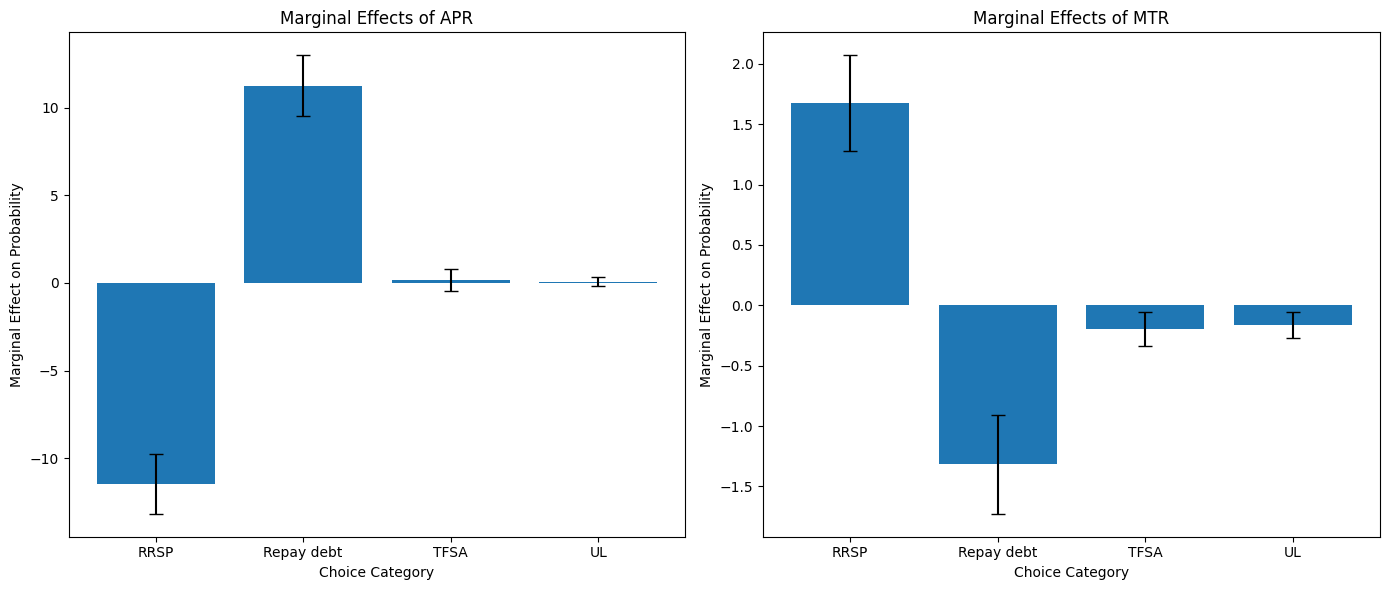

In [22]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

file_path = "clean_all.csv"
data = pd.read_csv(file_path)

# Define education level mapping for the control variable
education_mapping = {
    'Less than high school diploma or its equivalent': 1,
    'High school diploma or a high school equivalency certificate': 2,
    'Trade certificate or diploma': 3,
    'College, CEGEP or other non-university certificate or diploma (other than trades certificates or diplomas)': 4,
    'University certificate or diploma below the bachelor\'s level': 5,
    'Bachelor\'s degree (e.g. B.A., B.Sc., LL.B.)': 6,
    'University certificate, diploma, degree above the bachelor\'s level': 7
}
data['educ_level'] = data['educ'].map(education_mapping)

# Calculate Debt-to-Income Ratio (DIR)
data['DIR'] = data['debt_impute'] / data['income_impute']
data['DIR'] = data['DIR'].replace([np.inf, -np.inf], np.nan)  # Handle inf values
data['log_DIR'] = np.log(data['DIR'].replace(0, np.nan))  # Replace 0 with NaN to avoid log(0)
data.dropna(subset=['DIR', 'log_DIR', 'income_impute'], inplace=True)

# Define keyword mappings for scn1's options
answer_keywords = {
    'scn1': ["Repay debt", "RRSP", "TFSA", "UL"]
}

# Combine answers for scn1a and scn1b
question_pairs = {
    'scn1': ['scn1a_answer', 'scn1b_answer']
}

# Process scn1
question = 'scn1'
options = answer_keywords[question]

# Combine the answers in scn1a and scn1b into one column for keyword matching
data[question + '_combined'] = data[question_pairs[question][0]].fillna('') + ' ' + data[question_pairs[question][1]].fillna('')

# Create a target variable for scn1 based on keywords
conditions = [data[question + '_combined'].str.contains(opt, case=False, na=False) for opt in options]
data[question + '_target'] = np.select(conditions, options, default=np.nan)

# Drop any rows with missing target values for scn1
data.dropna(subset=[question + '_target'], inplace=True)

# Prepare the data for MNLogit: converting categorical targets to codes
data[question + '_target_code'] = data[question + '_target'].astype('category').cat.codes
mappings = {question + '_target': dict(enumerate(data[question + '_target'].astype('category').cat.categories))}

# Convert scn1a_apr and scn1b_apr from percentage strings to float
def percentage_to_float(x):
    if isinstance(x, str):
        return float(x.strip('%')) / 100
    return np.nan

data['scn1a_apr_float'] = data['scn1a_apr'].apply(percentage_to_float)
data['scn1b_apr_float'] = data['scn1b_apr'].apply(percentage_to_float)
data['scn1a_mtr_float'] = data['scn1a_mtr'].apply(percentage_to_float)
data['scn1b_mtr_float'] = data['scn1b_mtr'].apply(percentage_to_float)

# Handle missing values in the new variables
data[['scn1a_apr_float', 'scn1b_apr_float', 'scn1a_mtr_float', 'scn1b_mtr_float']] = data[['scn1a_apr_float', 'scn1b_apr_float', 'scn1a_mtr_float', 'scn1b_mtr_float']].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)

data['apr'] = data[['scn1a_apr_float', 'scn1b_apr_float']].mean(axis=1)
data['mtr'] = data[['scn1a_mtr_float', 'scn1b_mtr_float']].mean(axis=1)

# Define independent variables, including the new APR and MTR variables
X = data[['debt', 'age', 'educ_level', 'work_experience', 'income_impute', 'log_DIR', 'apr', 'mtr']]
X = sm.add_constant(X)  # Add intercept

# Ensure X and y are aligned and handle missing values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y = data[question + '_target_code'].loc[X.index]

# Fit the MNLogit model
model = sm.MNLogit(y, X)
result = model.fit()

# Calculate marginal effects for APR and MTR
marginal_effects = result.get_margeff(at="overall", method="dydx")
effects_summary = marginal_effects.summary_frame()

# Extract APR and MTR effects
apr_effects = effects_summary[effects_summary.index.get_level_values(1).str.contains("apr")]
mtr_effects = effects_summary[effects_summary.index.get_level_values(1).str.contains("mtr")]

# Plot APR and MTR marginal effects for each choice category
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# APR effects plot
ax[0].bar(apr_effects.index.get_level_values(0), apr_effects['dy/dx'], yerr=apr_effects['Std. Err.'], capsize=5)
ax[0].set_title("Marginal Effects of APR")
ax[0].set_xlabel("Choice Category")
ax[0].set_ylabel("Marginal Effect on Probability")
apr_categories = [int(str(i).split('=')[-1]) for i in apr_effects.index.get_level_values(0)]
ax[0].set_xticks(range(len(apr_categories)))
ax[0].set_xticklabels([mappings[question + '_target'][i] for i in apr_categories])

# MTR effects plot
ax[1].bar(mtr_effects.index.get_level_values(0), mtr_effects['dy/dx'], yerr=mtr_effects['Std. Err.'], capsize=5)
ax[1].set_title("Marginal Effects of MTR")
ax[1].set_xlabel("Choice Category")
ax[1].set_ylabel("Marginal Effect on Probability")
mtr_categories = [int(str(i).split('=')[-1]) for i in mtr_effects.index.get_level_values(0)]
ax[1].set_xticks(range(len(mtr_categories)))
ax[1].set_xticklabels([mappings[question + '_target'][i] for i in mtr_categories])

plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
data = pd.read_csv('clean_all.csv')

# Clean and transform the demographic and financial variables
data['age'] = data['age'].fillna(data['age'].mean())
data['gender'] = (data['gender'] == "Woman").astype(int)
data['french_survey'] = (data['language'] == "French").astype(int)
data['married'] = data['marital_status'].isin(["Married", "Living common-law"]).astype(int)
data['has_children'] = (data['children'] == "yes").astype(int)
data['work_experience'] = data['work_experience'].fillna(data['work_experience'].mean())
data['income_impute'] = data['income_impute'].fillna(data['income_impute'].mean())
data['education_highschool'] = data['educ'].isin([
    "Less than high school diploma or its equivalent",
    "High school diploma or a high school equivalency certificate",
    "Trade certificate or diploma"]).astype(int)
data['education_college'] = data['educ'].isin([
    "College, CEGEP or other non-university certificate or diploma (other than trades certificates or diplomas)",
    "University certificate or diploma below the bachelor's level"]).astype(int)
data['education_bachelor'] = data['educ'].isin([
    "Bachelor's degree (e.g. B.A., B.Sc., LL.B.)",
    "University certificate, diploma, degree above the bachelor's level"]).astype(int)

# Handle the debt variable
data['debt'] = data['debt_impute'].fillna(data['debt_impute'].mean())

# Prepare the scenario variables: MTR and APR
data['MTR_50'] = (data['scn1b_mtr'] == '50%').astype(int)
data['APR_5'] = (data['scn1b_apr'] == '5%').astype(int)
data['APR_7_5'] = (data['scn1b_apr'] == '7.5%').astype(int)

# Prepare independent variables with debt included
X_filtered = data[['MTR_50', 'APR_5', 'APR_7_5', 'age', 'gender', 'french_survey', 'married', 'has_children', 
                   'work_experience', 'income_impute', 'education_highschool', 'education_college', 
                   'education_bachelor', 'debt']]

# Check for multicollinearity using VIF
X_filtered_const = sm.add_constant(X_filtered)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered_const.values, i) for i in range(1, X_filtered_const.shape[1])]

print("VIF Data:")
print(vif_data)

# Drop variables with high VIF if necessary (e.g., VIF > 10)
# X_filtered = X_filtered.drop(columns=['column_name_with_high_VIF'])

# Standardize the variables for numerical stability
scaler = StandardScaler()
X_filtered_scaled = scaler.fit_transform(X_filtered)

# Prepare the dependent variable (scn1b_answer or scn1a_answer)
label_encoder = LabelEncoder()
y_filtered = label_encoder.fit_transform(data['scn1b_answer'])  # Adjust based on the scenario

# Print the class mapping (so you can interpret results later)
class_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Class Mapping:", class_mapping)

# Run the multinomial logit model (with robust standard errors)
try:
    model_mlogit = sm.MNLogit(y_filtered, X_filtered_scaled)
    result_mlogit = model_mlogit.fit(cov_type='HC0', maxiter=1000, disp=True)  # Use sandwich estimator for robust standard errors

    # Calculate and print marginal effects (average partial effects)
    marginal_effects = result_mlogit.get_margeff()
    print(marginal_effects.summary())
except Exception as e:
    print("Model fitting failed:", str(e))

# Alternative: Regularized Logistic Regression using Scikit-learn
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_filtered_scaled, y_filtered)

print("Model coefficients:")
print(model.coef_)


d:\python\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
d:\python\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF Data:
                 Feature       VIF
0                 MTR_50  1.009915
1                  APR_5  1.013586
2                APR_7_5       NaN
3                    age  2.186025
4                 gender  1.053964
5          french_survey  1.053998
6                married  1.103489
7           has_children  1.247555
8        work_experience  2.187985
9          income_impute  1.185980
10  education_highschool       inf
11     education_college       inf
12    education_bachelor       inf
13                  debt  1.103205
Class Mapping: {'RRSP': 0, 'Repay debt': 1, 'TFSA': 2, 'UL': 3}
Optimization terminated successfully.
         Current function value: 1.124356
         Iterations 190
Model fitting failed: Singular matrix
Model coefficients:
[[ 1.16991525 -0.00269398  0.         -0.16252244  0.08873225 -0.0139476
  -0.04648818  0.04511765  0.15771494  0.03439852  0.08604029  0.01221205
  -0.06142955  0.03459716]
 [ 0.04414887  0.08627438  0.         -0.1104491   0.07307815 -0.

## 1.DIR

In [ ]:
import pandas as pd

# Load dataset
file_path = "clean_all.csv"
data = pd.read_csv(file_path)

# Calculate Debt-to-Income Ratio (DIR) using imputed income and debt values
data['DIR'] = data['debt_impute'] / data['income_impute']
data['DIR'] = data['DIR'].replace([float('inf'), float('nan')], 0)  # Replace inf and NaN with 0


data[['debt_impute', 'income_impute', 'DIR']].head()


,debt_impute,income_impute,DIR
0,580000,110000,5.272727
1,0,200000,0.000000
2,295000,65000,4.538462
3,30000,150000,0.200000
4,0,150000,0.000000


## Risk level 

In [ ]:
# Define refined scores for each type of investment product
refined_investment_scores = {
    'etf': 10,
    'stocks': 9,
    'high return mutual fund': 8.5,
    'segregated fund': 8,
    'mutual fund': 7,
    'rrsp': 6.5, 
    'tfsa': 6,
    'ul policy': 5.5,
    'mortgage investment': 5,
    'annuity': 3,
    'long term care insurance': 2.5,
    'gic': 2,
    'bond': 1.5,
    'index linked gic': 1.2,
    'repay debt': 1
}

# Define function to score each investment product based on text
def refined_score_investment(text):
    """Assigns a risk score to each product based on predefined risk levels."""
    if pd.isna(text):
        return 0
    for product, score in refined_investment_scores.items():
        if product in text.lower():
            return score
    return 0

# Define scenario columns (investment answers only, without rates)
scenario_columns = [
    'scn1a_answer', 'scn2a_answer', 'scn3a_answer', 'scn4a_answer', 
    'scn1b_answer', 'scn2b_answer', 'scn3b_answer', 'scn4b_answer'
]

# Apply scoring function to each scenario answer to create new score columns
for col in scenario_columns:
    data[f'{col}_refined_investment_score'] = data[col].apply(refined_score_investment)

# Sum up all refined investment scores across scenarios to get the final risk score
data['adjusted_total_risk_score'] = data[[f'{col}_refined_investment_score' for col in scenario_columns]].sum(axis=1)

# Preview the adjusted total risk score to verify correct calculation
print(data[['adjusted_total_risk_score']].head())


NameError: name 'data' is not defined

According to all the answers from questionaire "SECTION 2. SHOW THE FOLLOWING TITLE TO RESPONDENTS", we refinined the calculation of the adjusted_total_risk_score by incorporating both the investment product scores and corresponding interest rates or fees for each scenario. This approach aims to produce a more nuanced risk score that reflects not only the type of investment recommended but also the associated rate, which can indicate additional risk elements.

We assign scores to each investment product mentioned in the scenario responses based on their inherent risk levels. For instance, high-risk products like ETFs receive a higher score, while low-risk products like bonds receive a lower score.

By multiplying each scenario’s investment product score with its corresponding rate (such as APR or fees), we create a weighted score. Higher rates typically indicate higher financial exposure or risk, so by treating the rate as a multiplier, we capture this aspect within the overall score.

After calculating each scenario’s adjusted score (product score * rate), we sum all scenarios to yield the adjusted_total_risk_score. This final score now accounts for both the inherent risk of each investment type and the added risk implied by high rates or fees.

## log-dir

In [ ]:
import numpy as np

# Classify DIR into low, medium, high categories based on quantiles
data['DIR_category'] = pd.qcut(data['DIR'], q=3, labels=['Low', 'Medium', 'High'])

# Apply log transformation to DIR, handling zeros by adding a small constant
data['log_DIR'] = np.log(data['DIR'] + 1e-5)

# Check the DIR categories and log-transformed DIR
data[['DIR', 'DIR_category', 'log_DIR']].head()


,DIR,DIR_category,log_DIR
0,5.272727,High,1.662550
1,0.000000,Low,-11.512925
2,4.538462,High,1.512590
3,0.200000,Low,-1.609388
4,0.000000,Low,-11.512925


## control variables

In [ ]:
# Check if control variables are available
control_variables = ['age', 'educ', 'work_experience']
print("Available columns:", data.columns)

# Display control variables
data[control_variables].head()


Available columns: Index(['respid', 'status', 'language', 'gender', 'age', 'province',
       'license_mutualfunds', 'license_insurance', 'license_securities',
       'educ',
       ...
       'scn2a_answer_refined_investment_score',
       'scn3a_answer_refined_investment_score',
       'scn4a_answer_refined_investment_score',
       'scn1b_answer_refined_investment_score',
       'scn2b_answer_refined_investment_score',
       'scn3b_answer_refined_investment_score',
       'scn4b_answer_refined_investment_score', 'adjusted_total_risk_score',
       'DIR_category', 'log_DIR'],
      dtype='object', length=215)


,age,educ,work_experience
0,26,"University certificate, diploma, degree above ...",2.0
1,47,"Bachelor's degree (e.g. B.A., B.Sc., LL.B.)",20.0
2,40,"Bachelor's degree (e.g. B.A., B.Sc., LL.B.)",1.0
3,41,"Bachelor's degree (e.g. B.A., B.Sc., LL.B.)",16.0
4,65,University certificate or diploma below the ba...,15.0


In [ ]:
# Define a mapping for the education levels
education_mapping = {
    'Less than high school diploma or its equivalent': 1,
    'High school diploma or a high school equivalency certificate': 2,
    'Trade certificate or diploma': 3,
    'College, CEGEP or other non-university certificate or diploma (other than trades certificates or diplomas)': 4,
    'University certificate or diploma below the bachelor\'s level': 5,
    'Bachelor\'s degree (e.g. B.A., B.Sc., LL.B.)': 6,
    'University certificate, diploma, degree above the bachelor\'s level': 7
}

# Map the education levels in the data to the numeric values
data['educ_level'] = data['educ'].map(education_mapping)

# Check the transformed education levels
data[['educ', 'educ_level']].head()


,educ,educ_level
0,"University certificate, diploma, degree above ...",7
1,"Bachelor's degree (e.g. B.A., B.Sc., LL.B.)",6
2,"Bachelor's degree (e.g. B.A., B.Sc., LL.B.)",6
3,"Bachelor's degree (e.g. B.A., B.Sc., LL.B.)",6
4,University certificate or diploma below the ba...,5


In [ ]:
# Convert DIR_category to dummy variables
X = pd.get_dummies(data['DIR_category'], drop_first=True)  # Drop "Low" as baseline
X['log_DIR'] = data['log_DIR']
X['debt'] = data['debt']
X['age'] = data['age']
X['educ'] = data['educ_level']
X['work_experience'] = data['work_experience']

# Define dependent variable
y = data['adjusted_total_risk_score']

# Check the prepared variables for regression
X.head()


,Medium,High,log_DIR,debt,age,educ,work_experience
0,False,True,1.662550,580000.0,26,7,2.0
1,False,False,-11.512925,0.0,47,6,20.0
2,False,True,1.512590,295000.0,40,6,1.0
3,False,False,-1.609388,30000.0,41,6,16.0
4,False,False,-11.512925,0.0,65,5,15.0


## Logit 

In [ ]:
data['binary_risk'] = data['adjusted_total_risk_score'].apply(lambda x: 1 if x >= 28 else 0)
y = data['binary_risk']

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

data_combined = pd.concat([X, y], axis=1).dropna().reset_index(drop=True)

X = data_combined.drop(columns=['binary_risk'])
y = data_combined['binary_risk']
X = X.astype(float)
y = y.astype(int)  
X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.560529
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            binary_risk   No. Observations:                  810
Model:                          Logit   Df Residuals:                      802
Method:                           MLE   Df Model:                            7
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                 0.01147
Time:                        17:37:15   Log-Likelihood:                -454.03
converged:                       True   LL-Null:                       -459.30
Covariance Type:            nonrobust   LLR p-value:                    0.1602
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.5408      0.668     -2.308      0.021      -2.849      -0.232
Medium        

The coefficient for log_DIR is -0.0632 with a p-value of 0.097, indicating that this effect is close to being statistically significant. This suggests that, although the data does not provide strong evidence, there may still be a meaningful relationship between an analyst’s debt-to-income ratio and their risk tolerance. This trend could become more pronounced with additional data or could reflect behavioral tendencies in financially leveraged individuals.

The coefficient for debt is very close to zero (6.439e-07), but its p-value of 0.047 suggests that it is statistically significant at the 5% level.Although the effect size appears small, statistical significance implies that absolute debt does indeed have an impact on the risk recommendation.

Debt-to-Income Ratio may dilute the perception of financial burden, as it considers both debt and income. It could be that analysts, consciously or subconsciously, regard absolute debt as a more direct measure of financial risk.

## VIF TEST

In [ ]:
import statsmodels.api as sm
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import brier_score_loss
from scipy.stats import chi2

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)


def hosmer_lemeshow_test(model, X, y, groups=10):
    prob = model.predict(X)
    data = pd.DataFrame({"Observed": y, "Predicted": prob})
    data['Decile'] = pd.qcut(data['Predicted'], groups, labels=False)
    hl_table = data.groupby('Decile').apply(lambda df: pd.Series({
        'Obs_1': df['Observed'].sum(),
        'Obs_0': (1 - df['Observed']).sum(),
        'Pred_1': df['Predicted'].sum(),
        'Pred_0': (1 - df['Predicted']).sum()
    }))
    hl_table['Chi_sq'] = (hl_table['Obs_1'] - hl_table['Pred_1']) ** 2 / hl_table['Pred_1'] + \
                         (hl_table['Obs_0'] - hl_table['Pred_0']) ** 2 / hl_table['Pred_0']
    chi_sq = hl_table['Chi_sq'].sum()
    p_value = 1 - chi2.cdf(chi_sq, groups - 2)
    return chi_sq, p_value

chi_sq, p_value = hosmer_lemeshow_test(logit_model, X, y)
print("Hosmer-Lemeshow Test:")
print(f"Chi-square: {chi_sq}, p-value: {p_value}")


Variance Inflation Factor (VIF):
          Variable        VIF
0            const  62.646212
1           Medium   4.844218
2             High   6.759587
3          log_DIR   5.261611
4             debt   1.842343
5              age   2.251609
6             educ   1.017195
7  work_experience   2.212070
Hosmer-Lemeshow Test:
Chi-square: 5.926804828141834, p-value: 0.6554306642640263



VIF Analysis: The VIF results indicate that there is no significant multicollinearity issue in the model, and the variables can be retained without concern for excessive correlation.

Hosmer-Lemeshow Test: The model performs well in terms of binary logistic regression fit, suggesting that the model's ability to predict risk classification aligns well with the observed data.

## mean and standard deviation of all variables used in the analysis

In [ ]:
# Calculate mean and standard deviation of all variables used in the analysis
# Assuming X and y are the variables used in the analysis
variables_summary = pd.DataFrame()
variables_summary['Mean'] = X.mean()
variables_summary['Standard Deviation'] = X.std()
variables_summary.loc['binary_risk', 'Mean'] = y.mean()
variables_summary.loc['binary_risk', 'Standard Deviation'] = y.std()
variables_summary = variables_summary.reset_index().rename(columns={'index': 'Variable'})
print(variables_summary)


          Variable           Mean  Standard Deviation
0            const       1.000000            0.000000
1           Medium       0.330864            0.470815
2             High       0.328395            0.469920
3          log_DIR      -2.735257            5.321379
4             debt  248401.575309       322287.536357
5              age      49.379012           11.993130
6             educ       5.601235            1.323085
7  work_experience      16.240741           10.044650
8      binary_risk       0.237037            0.425528


## Summary


Our study aimed to examine how personal financial characteristics of financial analysts influence their risk recommendations. Specifically, we focused on two main variables:

Debt-to-Income Ratio (DIR): Calculated as the ratio of an analyst’s total debt to their income, representing the relative financial pressure they may face.
Absolute Debt Level: The total debt amount, which serves as a measure of the absolute financial burden without considering income.
In addition, we analyzed other demographic and professional factors such as age, education level, and work experience, to understand their potential roles in shaping risk recommendation tendencies.
The debt variable, representing absolute debt, showed a positive and statistically significant effect on risk recommendations. This suggests that analysts with higher absolute debt levels were more likely to make higher-risk recommendations.The findings suggest that absolute debt level (debt) may be more psychologically impactful than DIR when influencing risk decisions. Analysts may feel the weight of their absolute debt more strongly than a ratio, which may seem abstract. Consequently, they could respond more readily to total debt, leading to a significant positive coefficient for debt but not for log_DIR.

Our findings suggest that personal financial status, specifically relative financial pressure (DIR) and absolute debt, may impact how financial analysts approach risk recommendations. Higher relative debt (DIR) appears to discourage high-risk recommendations, while higher absolute debt has the opposite effect, encouraging them to take on greater risk. This dual influence highlights the complex ways in which financial circumstances may affect professional decision-making in financial advising.

Name: Haotong Sun 11337172
Generate AI used for coding assistance